In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HR_comma_sep.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [3]:
dum_hr = pd.get_dummies(df, drop_first=True)
dum_hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True


In [4]:
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [5]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
gc = GradientBoostingClassifier(random_state=24)

params = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'max_depth': [1,3,5,7]
}
gcv = GridSearchCV(gc, param_grid=params, cv=kfold, verbose=3, scoring='neg_log_loss')
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-0.465 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-0.465 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-0.464 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-0.466 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=-0.461 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.425 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.424 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.424 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.426 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score

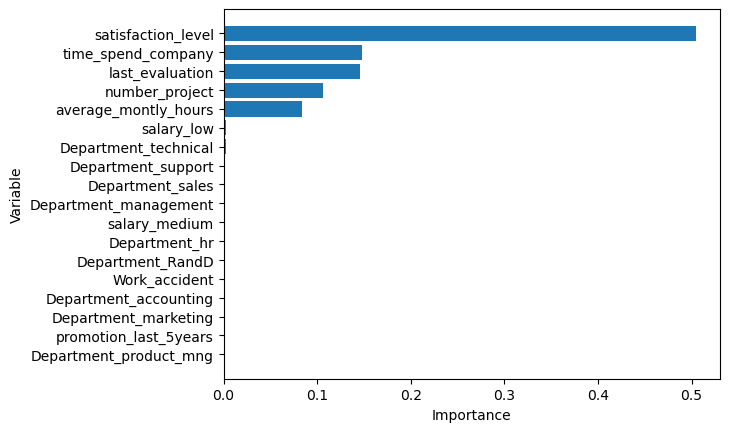

In [8]:
best_model = gcv.best_estimator_
pd_imp = pd.DataFrame({
    'var': list(X.columns),
    'imp': best_model.feature_importances_
})
pd_imp.sort_values(by='imp', inplace=True)
plt.barh(pd_imp['var'], pd_imp['imp'])
plt.ylabel('Variable')
plt.xlabel('Importance')
plt.show()